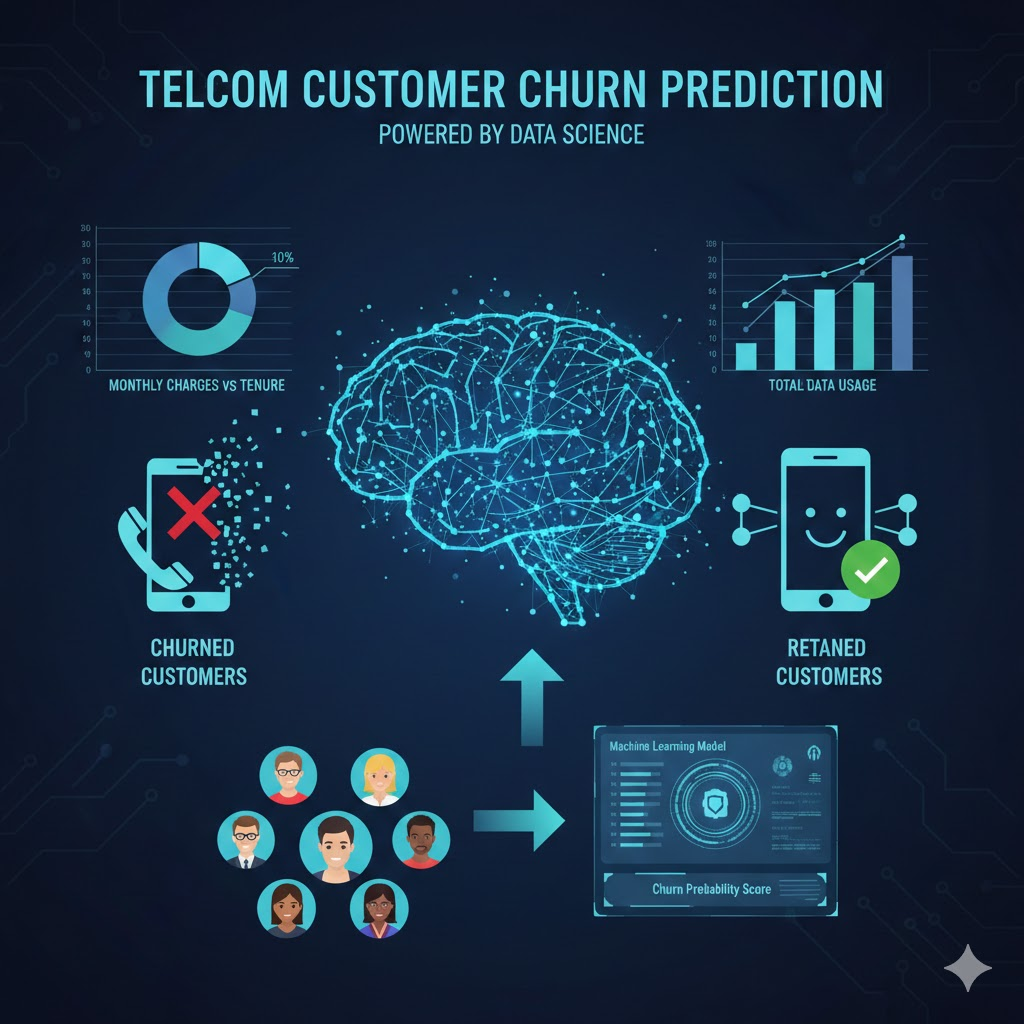

#dataset link :- https://www.kaggle.com/datasets/mosapabdelghany/telcom-customer-churn-dataset

In [49]:
#import neccesary libraries


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import pickle               # for saving the model

In [2]:
# importing the dataset
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mosapabdelghany/telcom-customer-churn-dataset")

print("Path to dataset files:", path)

100%|██████████| 172k/172k [00:00<00:00, 37.4MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/mosapabdelghany/telcom-customer-churn-dataset/versions/1


In [13]:
df = pd.read_csv(f'{path}/Telco_Cusomer_Churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [14]:
df = df.drop('customerID',axis = 1)

In [15]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [11]:
df[df.duplicated]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [16]:
df.size

140860

In [17]:

# --- Step 2: Exploratory Data Analysis (EDA) and Visualizations ---
print("\n--- Step 2: Basic EDA and Visualizations ---")
print("Initial Data Info:")
df.info()
print("\nDescriptive Statistics for Numerical Features:")
print(df.describe())


--- Step 2: Basic EDA and Visualizations ---
Initial Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 n

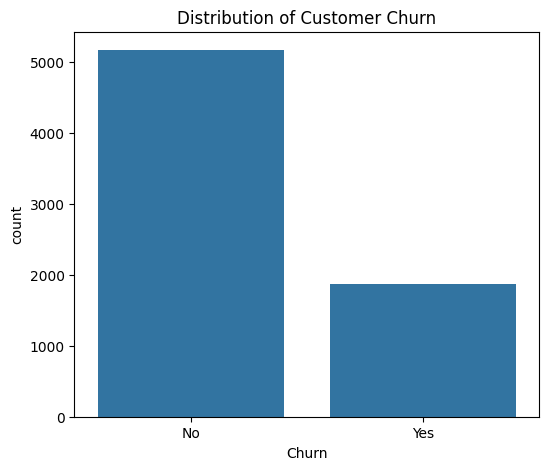

In [18]:
# A. Churn Distribution
plt.figure(figsize=(6, 5))
sns.countplot(x='Churn', data=df)
plt.title('Distribution of Customer Churn')
plt.show()

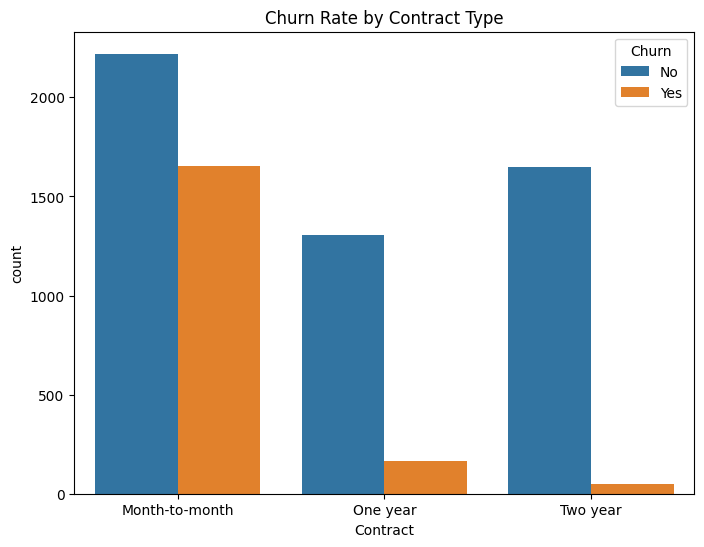

In [19]:
# B. Churn by Contract Type
plt.figure(figsize=(8, 6))
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title('Churn Rate by Contract Type')
plt.show()

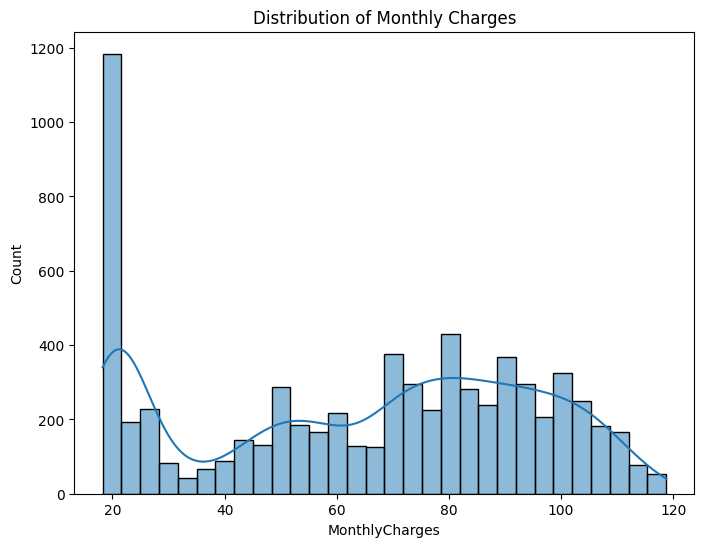

In [20]:
# C. Distribution of Monthly Charges
plt.figure(figsize=(8, 6))
sns.histplot(df['MonthlyCharges'], bins=30, kde=True)
plt.title('Distribution of Monthly Charges')
plt.show()

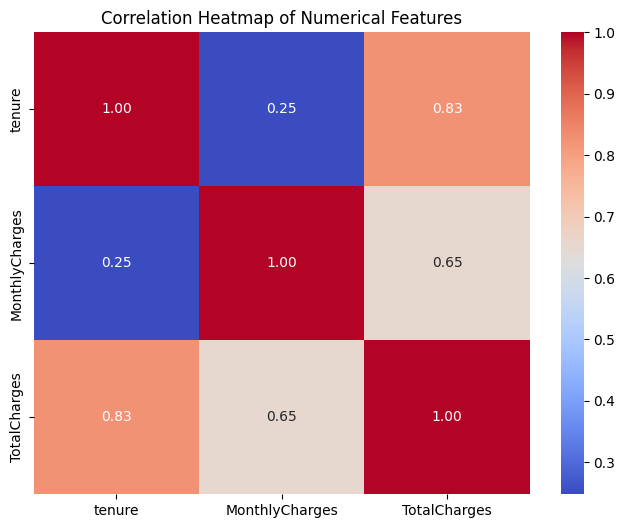

In [21]:
# D. Correlation Heatmap
numerical_features_to_plot = ['tenure', 'MonthlyCharges', 'TotalCharges']
df_corr = df[numerical_features_to_plot].copy()
df_corr['TotalCharges'] = pd.to_numeric(df_corr['TotalCharges'], errors='coerce')
corr_matrix = df_corr.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

In [22]:
# --- Step 3: Data Preprocessing for ANN ---
print("\n--- Step 3: Data Preprocessing for ANN ---")

# Handle TotalCharges (convert to numeric and drop missing rows)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(inplace=True)


--- Step 3: Data Preprocessing for ANN ---


In [24]:
# Separate features (X) and target (y)
X = df.drop(columns=['Churn'])
y = df['Churn'].map({'Yes': 1, 'No': 0})

In [25]:
# Identify categorical and numerical features
categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns

In [28]:
# Create preprocessing pipelines
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

In [29]:
# Ensure consistent results
tf.random.set_seed(42)

In [30]:

# Split data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

In [32]:
# Fit and transform the data
X_train_processed = preprocessor.fit_transform(X_train)
X_val_processed = preprocessor.transform(X_val)
X_test_processed = preprocessor.transform(X_test)
input_shape = X_train_processed.shape[1]
print("Data preprocessing complete. Starting model training...")
print("-" * 50)

Data preprocessing complete. Starting model training...
--------------------------------------------------


In [41]:
# --- Step 4: Building and Training the Three Models ---
model1 = Sequential([
    Dense(8, activation='relu', input_shape=(input_shape,)),
    Dense(1, activation='sigmoid')])



model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


early_stopping1 = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)



#training ---
history1 = model1.fit(X_train_processed, y_train,
                      epochs=100,
                      validation_data=(X_val_processed, y_val),
                      callbacks=[early_stopping1],
                      verbose=1)

Epoch 1/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - accuracy: 0.6362 - loss: 0.6185 - val_accuracy: 0.7896 - val_loss: 0.4403
Epoch 2/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7886 - loss: 0.4387 - val_accuracy: 0.8038 - val_loss: 0.4196
Epoch 3/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7980 - loss: 0.4259 - val_accuracy: 0.8076 - val_loss: 0.4149
Epoch 4/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7986 - loss: 0.4231 - val_accuracy: 0.8057 - val_loss: 0.4130
Epoch 5/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7998 - loss: 0.4215 - val_accuracy: 0.8104 - val_loss: 0.4127
Epoch 6/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8038 - loss: 0.4203 - val_accuracy: 0.8114 - val_loss: 0.4123
Epoch 7/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8038 - loss: 0.4193 - val_accuracy: 0.8114 - val_loss: 0.4118
Epoch 8/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8028 - loss: 0.4184 - val_acc

In [42]:
# --- Model 2: Intermediate Architecture
print("\n--- Model 2: Intermediate (2 Hidden Layers, 32/16 Neurons) with patience=5 ---")
model2 = Sequential([
    Dense(32, activation='relu', input_shape=(input_shape,)),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

early_stopping2 = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


history2 = model2.fit(X_train_processed, y_train,
                      epochs=100,
                      validation_data=(X_val_processed, y_val),
                      callbacks=[early_stopping2],
                      verbose=1)


--- Model 2: Intermediate (2 Hidden Layers, 32/16 Neurons) with patience=5 ---
Epoch 1/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.6991 - loss: 0.5539 - val_accuracy: 0.8047 - val_loss: 0.4167
Epoch 2/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7898 - loss: 0.4296 - val_accuracy: 0.8066 - val_loss: 0.4115
Epoch 3/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7918 - loss: 0.4242 - val_accuracy: 0.8095 - val_loss: 0.4113
Epoch 4/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7971 - loss: 0.4203 - val_accuracy: 0.8123 - val_loss: 0.4111
Epoch 5/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7997 - loss: 0.4172 - val_accuracy: 0.8133 - val_loss: 0.4111
Epoch 6/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8040 - loss: 0.4146 - val_accuracy: 0.8152 - val_loss: 0.4116
Epoch 7/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8070 - loss: 0.4126 - val_accuracy: 0.8123 - val_loss: 0.4120
Epoch 8/100
154/

In [43]:
# --- Model 3: Advanced Architecture
print("\n--- Model 3: Advanced (3 Hidden Layers, Dropout) with patience=7 ---")
model3 = Sequential([
    Dense(64, activation='relu', input_shape=(input_shape,)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])
model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
early_stopping3 = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)
history3 = model3.fit(X_train_processed, y_train,
                      epochs=100,
                      validation_data=(X_val_processed, y_val),
                      callbacks=[early_stopping3],
                      verbose=1)

print("-" * 50)
print("\n--- Step 5: Model Evaluation and Comparison ---")


--- Model 3: Advanced (3 Hidden Layers, Dropout) with patience=7 ---
Epoch 1/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 13s 22ms/step - accuracy: 0.7392 - loss: 0.5218 - val_accuracy: 0.8180 - val_loss: 0.4089
Epoch 2/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7876 - loss: 0.4352 - val_accuracy: 0.8199 - val_loss: 0.4070
Epoch 3/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8045 - loss: 0.4245 - val_accuracy: 0.8161 - val_loss: 0.4062
Epoch 4/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7960 - loss: 0.4317 - val_accuracy: 0.8171 - val_loss: 0.4078
Epoch 5/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7954 - loss: 0.4239 - val_accuracy: 0.8142 - val_loss: 0.4078
Epoch 6/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8017 - loss: 0.4248 - val_accuracy: 0.8152 - val_loss: 0.4106
Epoch 7/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7966 - loss: 0.4264 - val_accuracy: 0.8076 - val_loss: 0.4117
Epoch 8/100
154/154 ━━━━━

In [44]:
# Evaluate each model on the test set
_, acc1 = model1.evaluate(X_test_processed, y_test, verbose=0)
_, acc2 = model2.evaluate(X_test_processed, y_test, verbose=0)
_, acc3 = model3.evaluate(X_test_processed, y_test, verbose=0)

print(f"Model 1 (Simple) Test Accuracy: {acc1:.4f}")
print(f"Model 2 (Intermediate) Test Accuracy: {acc2:.4f}")
print(f"Model 3 (Advanced) Test Accuracy: {acc3:.4f}")


Model 1 (Simple) Test Accuracy: 0.7839
Model 2 (Intermediate) Test Accuracy: 0.7839
Model 3 (Advanced) Test Accuracy: 0.7848



--- Step 6: Generating Comparison Graph ---


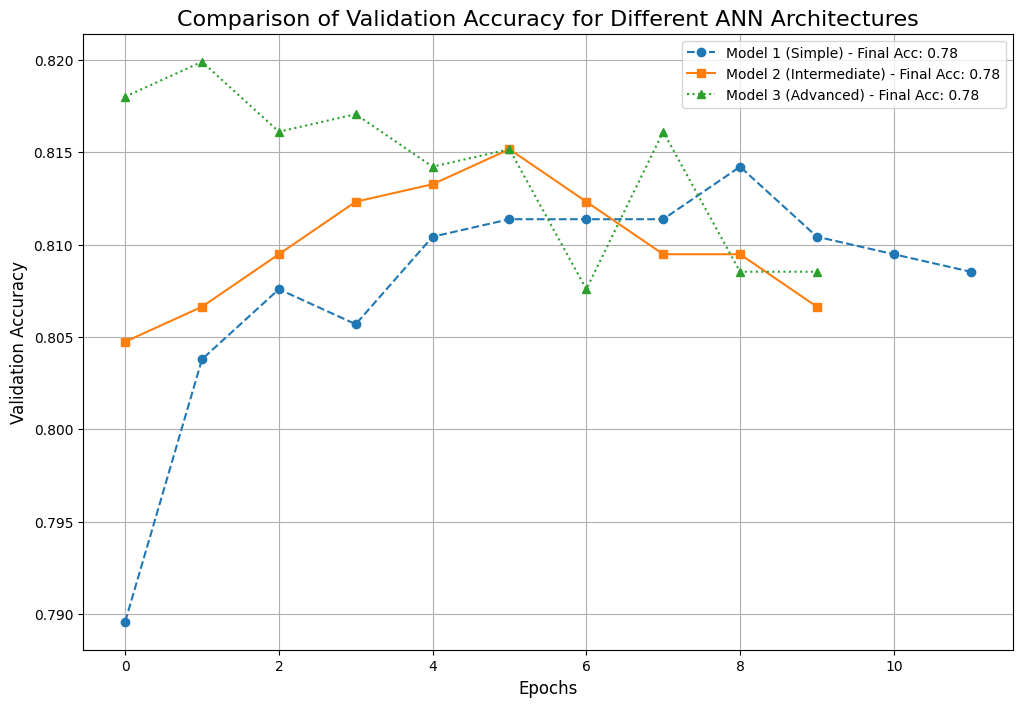

Comparison graph has been generated.


In [45]:
# --- Step 6: Visualizing the Comparison ---
print("\n--- Step 6: Generating Comparison Graph ---")

plt.figure(figsize=(12, 8))
plt.plot(history1.history['val_accuracy'], label=f'Model 1 (Simple) - Final Acc: {acc1:.2f}', marker='o', linestyle='--')
plt.plot(history2.history['val_accuracy'], label=f'Model 2 (Intermediate) - Final Acc: {acc2:.2f}', marker='s', linestyle='-')
plt.plot(history3.history['val_accuracy'], label=f'Model 3 (Advanced) - Final Acc: {acc3:.2f}', marker='^', linestyle=':')
plt.title('Comparison of Validation Accuracy for Different ANN Architectures', fontsize=16)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Validation Accuracy', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True)
plt.show()

print("Comparison graph has been generated.")


In [47]:
# --- finals steps: Evaluate and Select the Best Model ---
print("\n--- Step 3: Evaluating and Selecting the Best Model ---")
_, acc1_d2 = model1.evaluate(X_test_processed, y_test, verbose=0)
_, acc2_d2 = model2.evaluate(X_test_processed, y_test, verbose=0)
_, acc3_d2 = model3.evaluate(X_test_processed, y_test, verbose=0)

models = {
    "Model 1": {"model": model1, "accuracy": acc1_d2},
    "Model 2": {"model": model2, "accuracy": acc2_d2},
    "Model 3": {"model": model3, "accuracy": acc3_d2}
}

best_model_name = max(models, key=lambda name: models[name]["accuracy"])
best_model = models[best_model_name]["model"]
best_accuracy = models[best_model_name]["accuracy"]

print(f"Model 1 Test Accuracy: {acc1_d2:.4f}")
print(f"Model 2 Test Accuracy: {acc2_d2:.4f}")
print(f"Model 3 Test Accuracy: {acc3_d2:.4f}")
print(f"\nConclusion: The best model is '{best_model_name}' with an accuracy of {best_accuracy:.4f} on the test set.")


--- Step 3: Evaluating and Selecting the Best Model ---
Model 1 Test Accuracy: 0.7839
Model 2 Test Accuracy: 0.7839
Model 3 Test Accuracy: 0.7848

Conclusion: The best model is 'Model 3' with an accuracy of 0.7848 on the test set.


In [50]:
# --- Step 4: Saving the Best Model and Preprocessor ---
print("\n--- Step 4: Saving the Best Model and Preprocessor ---")

# The Keras model is saved using its native method
best_model.save('best_ann_model.h5')
print("✅ Best Keras model saved as 'best_ann_model.h5'")

# The preprocessor is saved using the pickle library as requested
with open('preprocessor.pkl', 'wb') as f:
    pickle.dump(preprocessor, f)

print("✅ Preprocessor saved as 'preprocessor.pkl' using pickle")


--- Step 4: Saving the Best Model and Preprocessor ---
✅ Best Keras model saved as 'best_ann_model.h5'
✅ Preprocessor saved as 'preprocessor.pkl' using pickle
